In [32]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
} 
$( document ).ready(code_toggle);
</script>''')

# The exponential random variable

## Introduction

The exponentially distributed random variable can be used to describe the process of waiting for something to occur.  When using this type of random variable you assume that the probability that the 
event will occur in the next $s$ seconds is independent of the ammount of time that you have waited thus far, $t$.  If we thus call the random ammount of time that we wait $T$ we thus have that:

$$
P(T>t+s)=P(T>t)P(T>s)
$$

This property is often referred to as the memorylessness as the probablity that the event will occur is unaffected by the ammount of time that we have waited thus far.  We thus state that the random 
process has no memory of all this waiting. 

## Transition graph and classification of states

We can describe the process of waiting for an event to occur using the two-state continuous time Markov chain illustrated below:

<img src='exponential-random-variable-chain.png'>

State 0 in this chain is the state we are in before the event occurs and state 1 is the state that we are in once the event has occured.  As you can see from the figure state 0 is transient, while 
state 1 is recurrent and absorbing.

## Jump rate matrix

The jump rate matrix for the two-state Markov chain described in the previous section is equal to:

$$
\mathbf{Q} = \left(
\begin{matrix}
 -\lambda & \lambda \\
 0 & 0
\end{matrix}
\right)
$$

where $\lambda$ is a rate parameter.

## Using the Kolmogorov equation

For this particular continuous time Markov chain we can use the Kolmogorov equation:

$$
\frac{\textrm{d}\mathbf{P}(t)}{\textrm{d}t} = \mathbf{P}(t)\mathbf{Q}
$$

to obtain an expression for the probability of being in each state at time $t$.  Inserting the Jump rate matrix from the previous section into the above equation gives:

$$
\left(
\begin{matrix}
 \textrm{d}P_{00}(t) / \textrm{d}t & \textrm{d}P_{01}(t) / \textrm{d}t \\
 \textrm{d}P_{10}(t) / \textrm{d}t & \textrm{d}P_{11}(t) / \textrm{d}t
\end{matrix}
\right) =
\left(
\begin{matrix}
 P_{00}(t) & P_{01}(t) \\
 P_{10}(t) & P_{11}(t) 
\end{matrix}
\right)
\left(
\begin{matrix}
 -\lambda & \lambda \\
 0 & 0
\end{matrix}
\right)
$$

Multiplying the first row of the first matrix on the right hand side of this equation by the first column of the second matrix on the right hand side of this equation gives:

$$
\frac{\textrm{d}P_{00}(t)}{\textrm{d}t } = -\lambda P_{00}(t)
$$

We can then solve this differential equation as follows:

$$
\frac{\textrm{d}P_{00}(t)}{\textrm{d}t } = -\lambda P_{00}(t) \quad \rightarrow \quad \int \frac{\textrm{d}P_{00}(t)}{P_{00}(t)} = - \int \lambda \textrm{d}t \quad \rightarrow \quad \ln[P_{00}(t)] 
= -\lambda t + C \quad \rightarrow \quad P_{00}(t) = Ae^{-\lambda t}
$$

where $A=e^{C}$.  $P_{00}(t)$ that we have obtained through this procedure is the probablity that at time $t$ we are still in state 0 - that is to say it is the probablity that at time $t$ the event 
has not yet happened.  Now it seems reasonable to assume that at time $t=0$ the event has not yet happened - after all if it had happened we wouldn't be waiting.  It is therefore safe to assume the 
boundary condition $P_{00}(0)=1$.  Inserting this condition into the above we find that:

$$
P_{00}(0)=Ae^{-\lambda 0} = 1 \qquad \rightarrow A \times 1 = 1 \qquad \rightarrow \qquad A=1
$$

The probablity that the event will not have happened at time $t$ is thus:

$$
P_{00}(t) = e^{-\lambda t}
$$

Meanwhile the probablity that it will have happened by time $t$ is:

$$
P_{01}(t) = 1 - P_{00}(t) = 1 - e^{-\lambda t}
$$

## Expected waiting time

We can calculate the expected time we would expect to wait for the event to occur by introducting a random variable $T$. This random variable measures the ammount of time it takes for 
the event to occur.  This is obvioualy a continuous random variable and in terms of this random variable the two probablities that we obtained in the previous part are:

$$
P_{00}(t) = P(T>t) \qquad \textrm{and} \qquad P_{01}(t) = P(T \le t)
$$

We thus state that the cumulative probablity distribution function for our random variable is $F_T(t) = 1-e^{-\lambda t}$.  To calculate the expectation of a continous random variable we must solve 
the following integral.

$$
\mathbb{E}(T) = \int_{-\infty}^\infty t f_T(t) \textrm{d}t
$$

where $f_T(t)$ is the probablity density function for our random variable, which can be found by taking the first derivative of the cumulative probablity distribution function.  In this case the 
probablity density function is thus:

$$
f_T(t) = \frac{\textrm{d}}{\textrm{d}t} \left[ 1 - e^{-\lambda t} \right] = \lambda e^{-\lambda t}
$$

Substituting this into our formula for the expectation and remembering that $T$ cannot be negeative as it is the ammount of time that we have to wait for an event we thus find that:

$$
\begin{aligned}
 \mathbb{E}(T) = \int_0^\infty t \lambda e^{-\lambda t} \textrm{d}t = \left[ t e^{-\lambda t} \right]_0^\infty - \int_0^\infty e^{-\lambda t} \textrm{d}t = \left[ -\frac{e^{-\lambda t}}{\lambda} 
\right]_0^\infty = \frac{1}{\lambda}
\end{aligned}
$$

## Numerical simulations

The cell below contains the python code for a function that generates exponentially distributed random variables.  It is hidden in this worksheet but you should show all the code that you use to generate plots.

In [9]:
import random
import math
from scipy.stats import norm

def exprand(p):
    urand = random.uniform(0,1)
    return - math.log(urand) / p

To test that I have implemented this function correctly I have, in the cell below, generated the sample mean and variance from 5000 indentical and independent expential random variables that I have generated using my function.  The parameter for the exponential random variable that I have used was set equal to 0.5 so the exact expectation should equal 2.0.  As you can see from below the sample mean I have calculated is within the 95 % confidence limit of this true expectation, which gives me confidence that I have implemented my function correctly.

In [15]:
mean, sqmean, n, nrand = 0, 0, 0,5000
for i in range(0,nrand):
    erand = exprand(0.5)
    mean += erand
    sqmean += erand*erand
    n += 1.0
    
mean = mean / n
sigma = sqmean /n - mean*mean
sigma = n*sigma/(n-1)
limit = (sigma/math.sqrt(nrand))*norm.ppf((0.95 + 1) / 2) 

print( "SAMPLE MEAN IS", mean, "WITH 95 % CONFIDENCE LIMIT", limit )

SAMPLE MEAN IS 2.021527329343546 WITH 95 % CONFIDENCE LIMIT 0.110136817043


To further test my implementation I have written code to estimate the cumulative probability distribution function for the random variable that I have generated by generating a large number of samples.  I have used a method here that is akin to what is done when a histogram is constructed.

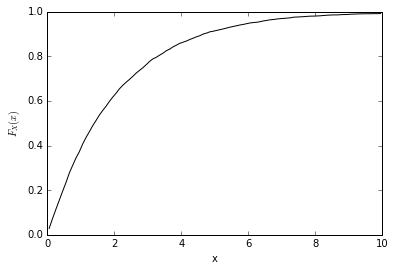

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

histo, xr, delr, N, nbins = [], [], 0.1, 5000, 100
for i in range(0,nbins):
    xr.append( (i+0.5)*delr )
    histo.append(0)
    
for i in range(0,N):
    erand = exprand(0.5)
    for j in range(0,nbins):
        if( erand < xr[j] ) : histo[j] += 1.

        
for i in range(0,nbins) : histo[i] = histo[i] / N 
    
plt.plot( xr, histo, 'k-' )
plt.xlabel("x")
plt.ylabel("$F_X(x)$")
plt.show()

## Beyond the assumptions of Markovianity


We can relax the Markov assumption for exponential random variables by introducing a survival function.  This survival function is a function of the form:

$$
S_T(t) = P(T > t ) = \exp\left( - \int_0^t \lambda(\tau) \textrm{d}\tau \right) 
$$

where $\lambda(\tau)$ is now a function of time known as a hazard function or failure rate that has the following property:

$$
\lim_{t \rightarrow \infty} t \lambda(t) = \infty
$$

This limit is required so as to ensure that $S_T(t) \rightarrow 0$ in the same limit.  It is trivial to derive expressions for the cumulative probability distribution function, the probability density function and the expectation starting from the expression for $S_T(t)$.

## References

In compiling the above report I used the following resources:


- https://en.wikipedia.org/wiki/Exponential\_distribution
- SOR3012 notes chapter 18
